In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 12.221 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info 

In [2]:
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()
import pack_cuda_lut
pack_cuda_lut._ensure_initialized()
import lap_batch
lap_batch._ensure_initialized()


Compiling CUDA LUT kernel one-time only)
Detected GPU compute capability: 89 (arch=sm_89)
Compiling: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -lineinfo -arch=sm_89 -cubin /mnt/d//packing/temp/pack_cuda_lut_saved.cu -o /mnt/d//packing/temp/pack_cuda_lut.cubin
/mnt/d//packing/temp/pack_cuda_lut_saved.cu:5: warning: "M_PI" redefined
    5 | #define M_PI 3.14159265358979323846f
      | 
In file included from /usr/include/c++/13/cmath:47,
                 from /usr/include/c++/13/math.h:36,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/math_functions.h:4577,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/common_functions.h:303,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime.h:117,
                 from <command-line>:
/usr/include/math.h:1152: note: this is the location of the previous definition
 1152 | # define M_PI     

In [3]:
%load_ext pyinstrument

In [4]:

import pack_ga3
import time
runner = pack_ga3.baseline()
runner.ga.do_legalize = False
runner.ga.ga_base.do_legalize = False
runner.ga.ga_base.N_trees_to_do = 156
runner.n_generations = 5
print(type(runner.rough_relaxers[0].cost.costs[2]))
#runner.rough_relaxers[0].cost.costs[2].use_lookup_table = True
runner.rough_relaxers[0].cost.costs[2]._ensure_lut_initialized()
#runner.fine_relaxers[0].cost.costs[2].use_lookup_table = True
#runner.fine_relaxers[0].cost.costs[2]._ensure_lut_initialized()


<class 'pack_cost.CollisionCostExactSeparation'>
Building lookup table for CollisionCostExactSeparation using Minkowski difference...
Building LUT: 451 x 900 x 900 = 365,310,000 grid points
  Processing theta 1/900
  Processing theta 51/900
  Processing theta 101/900
  Processing theta 151/900
  Processing theta 201/900
  Processing theta 251/900
  Processing theta 301/900
  Processing theta 351/900
  Processing theta 401/900
  Processing theta 451/900
  Processing theta 501/900
  Processing theta 551/900
  Processing theta 601/900
  Processing theta 651/900
  Processing theta 701/900
  Processing theta 751/900
  Processing theta 801/900
  Processing theta 851/900
Cost range: [-1.093621, 0.630274]
Trimming non-positive edges:
  X: 451 -> 362 (removed 89)
  Y: 900 -> 839 (removed 61)
  Theta: 900 -> 900 (removed 0)
  Total reduction: 25.2% (91,963,800 points)
Saving lookup table to cache: /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree116323fb.lut_cache...
Succ

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.339005, 2.067318]]
Generation 1: Best costs = [[0.339005, 1.050591]]
Generation 2: Best costs = [[0.339005, 0.776988]]
Generation 3: Best costs = [[0.339005, 0.705211]]
Generation 4: Best costs = [[0.339005, 0.620511]]
Elapsed time: 17.917292594909668


_     ._   __/__   _ _  _  _ _/_   Recorded: 21:18:46  Samples:  12933
 /_//_/// /_\ / //_// / //_'/ //     Duration: 17.925    CPU time: 18.253
/   _/                      v5.1.1

Cell [6]

18.831 <module>  /tmp/ipykernel_3556/617319491.py:1
`- 18.827 Orchestrator.run  pack_ga3.py:1318
   |- 10.872 Orchestrator._relax  pack_ga3.py:1274
   |  `- 10.756 run_simulation_list  pack_dynamics.py:633
   |     `- 10.730 OptimizerBFGS.run_simulation  pack_dynamics.py:42
   |        |- 10.444 lbfgs  lbfgs_torch_parallel.py:382
   |        |  |- 5.051 f_torch  pack_dynamics.py:68
   |        |  |  |- 4.408 Device.synchronize  <built-in>
   |        |  |  `- 0.422 CostCompound.compute_cost  pack_cost.py:50
   |        |  |     `- 0.408 CostCompound._compute_cost  pack_cost.py:95
   |        |  |        |- 0.209 [self]  pack_cost.py
   |        |  |        `- 0.198 AreaCost.compute_cost  pack_cost.py:50
   |        |  |- 4.474 [self]  lbfgs_torch_parallel.py
   |        |  `- 0.200 Tensor.any  <built-in>
   |        `- 0.242 from_dlpack  torch/utils/dlpack.py:58
   |           `- 0.230 _lazy_init  torch/cuda/__init__.py:382
   |- 3.699 GAMultiRing.generate_offspring  pack_ga3.py:333
   |  `- 3.699 GAMultiRing._generate_offspring  pack_ga3.py:622
   |     `- 3.641 GASinglePopulationOld.generate_offspring  pack_ga3.py:333
   |        `- 3.563 GASinglePopulationOld._generate_offspring  pack_ga3.py:1112
   |           `- 3.359 MoveSelector.do_move_vec  pack_move.py:42
   |              `- 3.359 MoveSelector._do_move_vec  pack_move.py:83
   |                 |- 2.581 JiggleCluster.do_move_vec  pack_move.py:42
   |                 |  |- 0.775 JiggleCluster._do_move_vec  pack_move.py:171
   |                 |  |  |- 0.437 [self]  pack_move.py
   |                 |  |  `- 0.246 argsort  cupy/_sorting/sort.py:93
   |                 |  |     `- 0.244 ndarray.argsort  <built-in>
   |                 |  |- 0.638 Crossover._do_move_vec  pack_move.py:307
   |                 |  |- 0.440 CrossoverStripe._do_move_vec  pack_move.py:532
   |                 |  |- 0.260 JiggleRandomTree._do_move_vec  pack_move.py:147
   |                 |  `- 0.198 Twist._do_move_vec  pack_move.py:254
   |                 |- 0.457 [self]  pack_move.py
   |                 `- 0.243 any  cupy/_logic/truth.py:55
   |- 3.105 GAMultiRing.apply_selection  pack_ga3.py:374
   |  `- 3.105 GAMultiRing._apply_selection  pack_ga3.py:553
   |     `- 3.105 GASinglePopulationOld.apply_selection  pack_ga3.py:374
   |        `- 3.105 GASinglePopulationOld._apply_selection  pack_ga3.py:999
   |           |- 2.509 compute_genetic_diversity  kaggle_support.py:1225
   |           |  `- 2.480 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |           |     `- 2.477 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |           |        |- 1.578 compute_diversity_shortcut_kernel  lap_batch.py:608
   |           |        |  |- 1.068 Device.synchronize  <built-in>
   |           |        |  `- 0.372 [self]  lap_batch.py
   |           |        |- 0.492 [self]  kaggle_support.py
   |           |        `- 0.344 Device.synchronize  <built-in>
   |           `- 0.240 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |              `- 0.240 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |                 `- 0.196 compute_diversity_shortcut_kernel  lap_batch.py:608
   |- 0.479 GAMultiRing.initialize  pack_ga3.py:279
   |  `- 0.479 GAMultiRing._initialize  pack_ga3.py:611
   |     `- 0.460 GAMultiRing._initialize  pack_ga3.py:466
   |        `- 0.299 ndarray.get  <built-in>
   |- 0.437 GAMultiRing.score  pack_ga3.py:289
   |  `- 0.437 GAMultiRing._score  pack_ga3.py:479
   |     |- 0.225 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |     `- 0.211 GASinglePopulationOld.score  pack_ga3.py:289
   |        `- 0.211 GASinglePopulationOld._score  pack_ga3.py:734
   `- 0.206 GAMultiRing.reset  pack_ga3.py:284
      `- 0.206 GAMultiRi
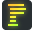

In [5]:
%%pyinstrument
kgs.profiling=True
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [6]:
kgs.print_module_profile()
